# E-14-프로젝트 : 폐렴 진단기 성능개선  
  
딥러닝 기술이 산업적으로 명확한 용도를 입증한 도메인 중 하나로 의료 분야를 들 수 있습니다. 의료영상을 분석하는 일은 전문적인 훈련을 받은 숙련된 의료인력만 가능한 일입니다만, 최근의 발달된 딥러닝 기술은 숙련자 수준 이상의 정확도를 바탕으로 영상분석 인력의 개인적 편차 ,주관적 판단, 피로에 의한 오진 등의 부정확성을 극복할 수 있는 좋은 대안으로 인정받고 있습니다.  
  
하지만, 의료영상을 분석하는 것은 일반적인 이미지 처리와는 다소 다른 독특한 특징이 있습니다.  
  
* 의료영상 이미지는 개인정보 보호 등의 이슈로 인해 데이터를 구하는 것이 쉽지 않습니다.  
* 라벨링 작업 자체가 전문적 지식을 요하므로 데이터셋 구축 비용이 비쌉니다.  
* 희귀질병을 다루는 경우 데이터를 입수하는 것 자체가 드문 일입니다.  
* 음성/양성 데이터간 imbalance가 심합니다. 학습에 주의가 필요합니다.  
* 이미지만으로 진단이 쉽지 않아 다른 데이터와 결합해서 해석해야 할수도 있습니다.  
  
따라서 의료영상 처리를 위해서는 딥러닝 영상처리 기술 뿐 아니라, 의료 도메인 지식 및 의료영상에 대한 명확한 이해가 아울러 필요합니다.  
  
오늘은 의료영상의 기초 상식에 대해 간단히 알아보고, 실제로 의료영상 데이터를 처리하는 실습을 해보려고 합니다.  
  
#### 의료영상 자세 분류  
* Sagittal plane : 시상면. 사람을 왼쪽과 오른쪽을 나누는 면.  
* Coronal plane : 관상면. 인체를 앞 뒤로 나누는 면.  
* Transverse plane : 횡단면(수평면). 인체를 상하로 나누는 면.  
  
#### X-RAY 특성  
X-RAY는 전자기파가 몸을 통과한 결과를 이미지화 시킨 것입니다. 즉, 통과하고 남은 전자기파의 결과이기 때문에 색상이 아니라 흑백 명암으로 나오게 됩니다.  
* 뼈 : 하얀색  
* 근육 및 지방 : 연한 회색  
* 공기 : 검은색  
  
#### 예 : 흉부 영상  
* 갈비뼈 : 하얀색  
* 폐 : 검은색  
* 어깨 쪽의 지방 및 근육 : 연한 회색  
  
## 폐렴을 진단해보자  
  
의료 인공지능은 다양한 분야에서 사용됩니다. 질병의 정확한 분류 또는 환자의 중증도를 확인하는 용도 등 다양한 용도로 사용됩니다.  
  
이중에서 현재 가장 핫한 분야는 질병을 탐지해내는 인공지능 입니다. 이제 우리는 의사처럼 질병을 찾아내는 딥러닝 모델을 만들어보려고 합니다.  
  
우리가 할 것은 폐렴(Pneumonia)을 찾아내는 딥러닝 모델을 만드는 것입니다. 폐럼에 대해서 전혀 모르신다구요? 아래에 쉽게 이해할 수 있도록 설명 해놓았으니 너무 걱정마세요~  
  
### 데이터셋  
이번 노드에서 사용할 데이터는 캐글의 Chest X-Ray Images 입니다.  
폴더를 생성하고 캐글에서 데이터를 다운받아주세요.  
https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

```
$ mkdir -p ~/aiffel/chest_xray  
$ cd ~/Downloads && unzip archive.zip -d ~/aiffel  
```  
위와 같이 압축을 풀고 나면, 데이터의 구성은 ~/aiffel/chest_xray 하위에 3개의 폴더 (train, test, val)로 구성되며, 각 이미지 카테고리 (폐렴 / 정상)에 대한 하위 폴더를 포함합니다. 5,856 개의 X-Ray 이미지 (JPEG)와 2 개의 범주 (폐렴 / 정상)가 있습니다. 전체 데이터의 크기는 총 1.2GB 가량 됩니다.  

(에디터 주) 캐글에서 다운로드한 데이터는 chest_xray 하위에 chest_xray 폴더가 중복으로 포함되어 있어서 전체 데이터의 크기가 2.5GB인 경우가 있습니다. 중복된 데이터는 필요하지 않습니다.  
  
해당 이미지는 중국 광저우에 있는 광저우 여성 및 어린이 병원의 1~5 세 소아 환자의 흉부 X 선 영상입니다.  

#### 폐렴이란?  
우리가 데이터를 직접 분석하기 전에 폐렴에 대해서 알아야겠죠? 폐렴은 무엇일까요? 요즘.. 코로나 때문에 폐렴에 대한 지식을 어느정도 가졌을 것으로 생각듭니다.  
  
* 폐렴(pneumonia 뉴모니아)은 폐에 염증이 생긴 상태로 중증의 호흡기 감염병이다. 세균을 통한 감염이 가장 많으며, 바이러스, 균류, 또는 기타 미생물도 원인이 될 수가 있다. 드물게는 알레르기 반응이나 자극적인 화학 물질을 흡입해 발생하기도 한다. 노인이나 어린아이, 혹은 전체적으로 상태가 안 좋은 환자들이나 기침 반사가 약한 사람들에게는 흡인성 폐렴이 발생한다. 그리고 세균이 원인인 경우는 항생제로 치료를 할 수 있다. 항생제가 생기기 전에는 50~90%가 사망할 정도로 위험한 질환이었으나, 현재는 거의 사망하지 않는다. 1940년대에 항생제가 개발되기 전까지는 폐렴 환자의 1/3 정도가 사망하였다. 오늘날에는 적절한 의학적 치료로 폐렴 환자의 95% 이상이 회복된다. 그러나 일부 저개발국(개발 도상국)에서는 폐렴이 여전히 주요 사망 원인 중 하나이다.  
* 출처 : https://ko.wikipedia.org/wiki/폐렴  
  
폐렴은 쉽게 말해 폐에 염증이 생기는 것입니다. 일단 폐는 여러분들도 너무 잘 아시는것과 같이 공기를 들이마셔 호흡 작용을 하는 기관이겠죠? 그럼 염증은 정확히 무엇일까요?  
  
* 염증은 유해한 자극에 대한 생체반응 중 하나로 면역세포, 혈관, 염증 매개체들이 관여하는 보호반응이다. 염증의 목적은 세포의 손상을 초기 단계에서 억제하고, 상처부분의 파괴된 조직 및 괴사된 세포를 제거하며, 동시에 조직을 재생하는 것이다.  
* 출처 : https://ko.wikipedia.org/wiki/염증  
  
염증은 쉽게 말해 우리 몸을 지키기 위해 백혈구들이 싸우고 있는 장소라고 할 수 있습니다. 폐렴이라면 폐에서 바이러스나 세균으로부터 우리 몸을 지키기 위해 백혈구들이 싸우고 있는 상황이라고 생각하시면 됩니다.  
  
#### 폐렴 구별법  
폐렴의 구별법은 언뜻 예상 외로 간단합니다.  
X-RAY 사진상, 다양한 양상의 음영(폐 부위에 희미한 그림자) 증가가 관찰됩니다.  
구별 방법은 간단하지만 실제로 영상을 보면 희미한 경우가 많이 있어 저게 실제로 폐렴으로 인한 것인지 아니면 다른 이유 때문인지 파악하기 어렵습니다.  
  
![Screenshot from 2021-03-05 13-52-02](https://user-images.githubusercontent.com/76797423/110069039-47632100-7dba-11eb-9cee-e2b9dfccc859.png)  
  
정상적인 흉부 X-RAY(왼쪽)는 이미지에서 비정상적인 음영 영역이 없는 깨끗한 폐를 보여줍니다.  
세균성 폐렴 (가운데)은 일반적으로 오른쪽 상부 엽 (흰색 화살표)에 있는 나타내는 반면, 바이러스성 폐렴 (오른쪽)은 양쪽 폐에서보다 확산 된 "interstitial(조직 사이에 있는)" 패턴으로 나타납니다.  
  
위와 같이 폐렴에 걸린 사진들은 특징이 패턴을 이루고 있는 것을 볼 수 있습니다.  
이런 패턴을 잘 읽어내는 딥러닝 알고리즘은 충분히 학습 시킬 수 있을 것 같죠?  
딥러닝 알고리즘들이 패턴인식 알고리즘의 일종이라고 부르는 것처럼, 이 이미지에서 폐렴의 특징 패턴을 학습해서 찾아내게 시키면 됩니다.

## Step 1. 실험환경 Set-up  
Batch size, Epoch 등을 변경  
* 배치사이즈 참고 : https://medium.com/lunit/batch-size-in-deep-learning-696e1b57764f
* 나중에 참고 : https://blog.naver.com/PostView.nhn?blogId=koys007&logNo=221261032274&from=search&redirect=Log&widgetTypeCall=true&directAccess=false

In [1]:
# 패키지(라이브러리)들을 import

import re    # 정규표현식 관련된 작업에 필요한 패키지
import os    # I/O 관련된 작업에 필요한 패키지 
import pandas as pd     # 데이터 전처리 관련된 작업에 필요한 패키지
import numpy as np      # 데이터 array 작업에 필요한 패키지
import tensorflow as tf  # 딥러닝 관련된 작업에 필요한 패키지
import matplotlib.pyplot as plt    # 데이터 시각화에 관련된 작업에 필요한 패키지
from sklearn.model_selection import train_test_split  # 데이터 전처리에 필요한 패키지

In [2]:
# 앞으로 필요한 변수들을 생성

# 데이터 로드할 때 빠르게 로드할 수 있도록하는 설정 변수
AUTOTUNE = tf.data.experimental.AUTOTUNE

# 데이터 ROOT 경로 변수
ROOT_PATH = os.path.join(os.getenv('HOME'), 'aiffel')

# BATCH_SIZE 변수
BATCH_SIZE = 16

# X-RAY 이미지 사이즈 변수
IMAGE_SIZE = [180, 180]

# EPOCH 크기 변수
EPOCHS = 30

print(ROOT_PATH)

/home/aiffel-dj42/aiffel


## Step 2. 데이터 준비하기  
원본 데이터를 가져와서 전처리 및 배치 구성을 진행합니다.  
의료영상 이미지의 특성상 데이터는 언제나 충분하지 않습니다. 이를 극복할 수 있는 방법을 고민해 봅시다.  
  
이전 실습에서 고려하지 않았던 augmentation 기법을 고려해 볼 수 있을 것입니다. 그러나 의료영상인 경우, 일반적인 이미지처리에서 사용하는 augmentation들이 항상 도움이 된다고 말할 수 없습니다. 특히 X-RAY 같은 의료영상의 특성상, 육안으로도 구분하기 어려운 미묘한 차이에 더해진 노이즈 등 부수효과가 오히려 방해를 줄 수도 있기 때문입니다.  
그래서 augmentation 도입은 신중해야 합니다.

In [3]:
# 각 데이터들의 갯수 체크

train_filenames = tf.io.gfile.glob(str(ROOT_PATH + '/chest_xray/train/*/*'))
test_filenames = tf.io.gfile.glob(str(ROOT_PATH + '/chest_xray/test/*/*'))
val_filenames = tf.io.gfile.glob(str(ROOT_PATH + '/chest_xray/val/*/*'))

print(len(train_filenames))
print(len(test_filenames))
print(len(val_filenames))

5216
624
16


* train = 5216개, test = 624개, val = 16개  
* 갯수 비율은 89%, 10.7%, 0.3%  
* val 갯수가 너무 없기 때문에 train에서 val에 쓰일 데이터를 더 가져올 것임  
* train과 val에 있는 데이터를 모은 다음에 train : val를 7.5:2.5으로 분할

In [4]:
filenames = tf.io.gfile.glob(str(ROOT_PATH + '/chest_xray/train/*/*'))
filenames.extend(tf.io.gfile.glob(str(ROOT_PATH + '/chest_xray/val/*/*')))

# train, test(val) dataset으로 분할
train_filenames, val_filenames = train_test_split(filenames, test_size=0.25)

print(len(train_filenames))
print(len(val_filenames))

3924
1308


* 이제 train = 4185개, test = 624개, val = 1047개

In [5]:
# train 데이터 안에 정상 이미지 수와 폐렴 이미지 수를 한번 보겠습니다.

COUNT_NORMAL = len([filename for filename in train_filenames if "NORMAL" in filename])
print("Normal images count in training set: " + str(COUNT_NORMAL))

COUNT_PNEUMONIA = len([filename for filename in train_filenames if "PNEUMONIA" in filename])
print("Pneumonia images count in training set: " + str(COUNT_PNEUMONIA))

Normal images count in training set: 996
Pneumonia images count in training set: 2928


* 정상보다 폐렴 이미지 수가 3배 더 많음  
  - 우리가 사용할 CNN 모델의 경우 데이터가 클래스별 balance가 좋을 수록 training을 잘 함  
  - 데이터가 클래스 불균형(imbalance)한 것은 차후에 조정할 예정  
  - test와 val 데이터셋은 평가하기 위해서 사용되기 때문에 학습과 관련이 없으므로 imbalance한 데이터 셋이어도 문제 없음  
* tf.data 인스턴스 만들기 : tf.data는 tensorflow에서 학습시킬 때, 배치처리 작업을 보다 효율적으로 할 수 있도록 해줌

In [6]:
train_list_ds = tf.data.Dataset.from_tensor_slices(train_filenames)
val_list_ds = tf.data.Dataset.from_tensor_slices(val_filenames)

In [7]:
# Train 데이터 셋, validation 데이터 셋 갯수 확인

TRAIN_IMG_COUNT = tf.data.experimental.cardinality(train_list_ds).numpy()
print("Training images count: " + str(TRAIN_IMG_COUNT))

VAL_IMG_COUNT = tf.data.experimental.cardinality(val_list_ds).numpy()
print("Validating images count: " + str(VAL_IMG_COUNT))

Training images count: 3924
Validating images count: 1308


In [8]:
# 라벨 이름들 확인

CLASS_NAMES = np.array([str(tf.strings.split(item, os.path.sep)[-1].numpy())[2:-1]
                        for item in tf.io.gfile.glob(str(ROOT_PATH + "/chest_xray/train/*"))])
print(CLASS_NAMES)

['NORMAL' 'PNEUMONIA']


* 두 개의 라벨 : 정상을 의미하는 'NORMAL', 폐렴을 의미하는 'PNEUMONIA'  
* 현재 이미지에는 라벨 데이터가 따로 없고, 제목에 'NORMAL', 'PNEUMONIA'라고 되어 있기 때문에, 이를 이용하여 라벨 데이터를 만들어 주는 함수 생성

In [9]:
def get_label(file_path):
    parts = tf.strings.split(file_path, os.path.sep)
    return parts[-2] == "PNEUMONIA"   # 폐렴이면 양성(True), 노말이면 음성(False)를 리턴

* 이미지 데이터는 사이즈가 제각각일 가능성 높음
* 이미지의 사이즈를 통일 시키고 GPU 메모리를 더욱 효율적으로 사용하기 위해 이미지 사이즈를 줄이기
* decode_img 함수와 process_path 함수를 만들기  
* process_path 함수에서 decode_img 함수를 이용해서 이미지의 데이터 타입을 float으로 바꾸고 사이즈를 변경하고, get_label을 이용해서 라벨 값 가져오기

In [10]:
def decode_img(img):
  # 이미지를 uint8 tensor로 바꾼다.
  img = tf.image.decode_jpeg(img, channels=3)
  # img를 범위 [0,1]의 float32 데이터 타입으로 바꾼다.
  img = tf.image.convert_image_dtype(img, tf.float32)
  # img의 이미지 사이즈를 IMAGE_SIZE에서 지정한 사이즈로 수정한다.
  return tf.image.resize(img, IMAGE_SIZE)

def process_path(file_path):
    label = get_label(file_path)
    img = tf.io.read_file(file_path)
    img = decode_img(img)
    return img, label

* train 데이터 셋과 validation 데이터 셋 생성  
  - num_parallel_calls 파라미터에 set-up에서 초기화 한 AUTOTUNE을 이용하면 더욱 빠르게 데이터 처리

In [11]:
train_ds = train_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
val_ds = val_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

* 이미지가 잘 리사이즈 되었는지, 라벨이 잘 들어가 있는지 확인

In [12]:
for image, label in train_ds.take(1):
    print("Image shape: ", image.numpy().shape)
    print("Label: ", label.numpy())

Image shape:  (180, 180, 3)
Label:  True


* 참고 : 코드에서 train_ds.take(1)은 하나의 데이터만 가져온다 라는 의미  
* 위에서 train과 validation 데이터셋을 만든 것 처럼 test 데이터셋도 만들고 데이터 갯수도 확인

In [13]:
test_list_ds = tf.data.Dataset.list_files(str(ROOT_PATH + '/chest_xray/test/*/*'))
TEST_IMAGE_COUNT = tf.data.experimental.cardinality(test_list_ds).numpy()
test_ds = test_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
test_ds = test_ds.batch(BATCH_SIZE)

print(TEST_IMAGE_COUNT)

624


* Tensorflow 에서는 tf.data 파이프라인을 사용해서 학습 데이터를 효율적으로 사용할 수 있도록 해줌  
  - prepare_for_training() 함수 : 학습 데이터를 효율적으로 할 수 있도록 데이터를 변환시킴  
  - shuffle() : 고정 크기 버퍼를 유지하고 해당 버퍼에서 무작위로 균일하게 다음 요소를 선택  
  - repeat() : epoch를 진행하면서 여러번 데이터셋을 불러오게 되는데, 이때 repeat()를 사용한 데이터셋의 경우 여러번 데이터셋을 사용할 수 있게 해줌. 예를 들어, 100개의 데이터를 10번 반복하면 1000개의 데이터가 필요하게 되는데 repeat()를 사용하면 자동으로 데이터를 맞춰줌  
  - batch() : BATCH_SIZE 에서 정한 만큼의 배치로 주어짐. 예를 들어, 100개의 데이터를 10개의 배치로 나누게 되면 각 배치에는 10개의 데이터로 나뉘게 됨  
  - prefetch() : 학습데이터를 나눠서 읽어오기 때문에, 첫 번째 데이터를 GPU에서 학습하는 동안 두 번째 데이터를 CPU에서 준비할 수 있어 리소스의 유휴 상태를 줄일 수 있음

In [14]:
def augment(image,label):
    image = tf.image.random_flip_left_right(image)  # 랜덤하게 좌우를 반전합니다.
    return image,label

def prepare_for_training(ds, shuffle_buffer_size=1000):
    # augment 적용 부분이 배치처리 함수에 추가됨
    ds = ds.map(
            augment,       # augment 함수 적용
            num_parallel_calls=2
        )

    ds = ds.shuffle(buffer_size=shuffle_buffer_size)

    ds = ds.repeat()

    ds = ds.batch(BATCH_SIZE)

    ds = ds.prefetch(buffer_size=AUTOTUNE)

    return ds

train_ds = prepare_for_training(train_ds)
val_ds = prepare_for_training(val_ds)

## Step 3. 데이터 시각화  
학습용 데이터를 시각화해서 확인해 봅니다.  
만약 augmentation을 시도했다면 이후 실습코드에 있는 show_batch() 함수를 통해 실제로 좌우반전 등이 제대로 처리되었는지 확인해 봅시다.

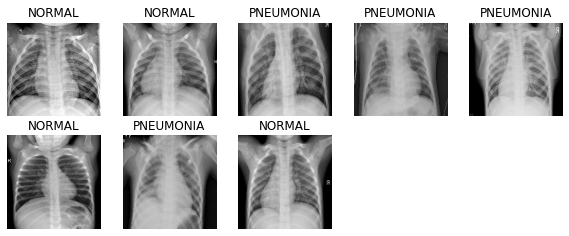

In [15]:
image_batch, label_batch = next(iter(train_ds))

def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10,10))
    for n in range(8):
        ax = plt.subplot(5,5,n+1)
        plt.imshow(image_batch[n])
        if label_batch[n]:
            plt.title("PNEUMONIA")
        else:
            plt.title("NORMAL")
        plt.axis("off")

show_batch(image_batch.numpy(), label_batch.numpy())

## Step 4. CNN 모델링  
* 참고 : taewan.kim/post/cnn/  
* 순서 : Convolution block 만들기, conv_block()  
  - Convolution 두 번 진행  
  - Batch Normalization을 통해서 Gradient vanishing, Gradient Exploding을 해결  
  - Max Pooling  
  
의료영상 판독을 위해 실습에서 구현했던 model에서 다양한 것들을 바꾸어 가며 실험해볼 수 있습니다. Convolution filter, 채널 개수, activation, 모델구조 등을 다양하게 바꾸어볼 수 있습니다.  
  
그리고, 우리는 BatchNormalization과 Dropout을 한 모델 안에서 동시에 사용하는 특이한 구성을 실습했습니다.  
이것은 일반적으로 잘 사용되는 형태는 아닙니다. 하지만 이미지 사이즈가 크고 데이터가 부족한 의료영상에서는 실용적으로 간혹 좋은 성능을 보이기도 합니다. 만약 이 구성을 변경해 보면 어떤 효과가 발생하는지도 실험해 봅시다. BatchNormalization을 쓰거나 혹은 쓰지 않거나, Dropout을 쓰거나 혹은 쓰지 않거나 할 수 있습니다. 또, Dropout 비율을 변경해볼 수도 있습니다.

In [16]:
def conv_block(filters):
    block = tf.keras.Sequential([
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D()
    ]
    )
    
    return block

In [17]:
# Dense Block은 아래와 같이 만듭니다.

def dense_block(units, dropout_rate):
    block = tf.keras.Sequential([
        tf.keras.layers.Dense(units, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(dropout_rate)
    ])
    
    return block

* 우리가 만들 CNN 모델은 약간의 수정을 거쳐 만들어진 모델입니다. 전형적인 CNN 모델과는 약간 다른 모델입니다.  
* 어떤 부분이 가장 특이한가요? 눈에 띄셨을지 모르겠지만, 방금 만들어진 모델에는 Batch Normalization과 Dropout이라는 두가지 regularization 기법이 동시에 사용되고 있습니다.  
* 일반적으로 이런 방법은 잘 사용되지 않거나, 금기시되기도 합니다. 대표적으로 아래와 같은 논문의 사례를 들 수 있습니다.  
* https://openaccess.thecvf.com/content_CVPR_2019/papers/Li_Understanding_the_Disharmony_Between_Dropout_and_Batch_Normalization_by_Variance_CVPR_2019_paper.pdf  
* 위 논문에서는 variance shift를 억제하는 Batch Normalization과 이를 유발시키는 Dropout을 동시에 사용하는 것이 어울리지 않는다고 밝히고 있습니다.  
* 그러나, 실용적으로는 두 방법을 같이 쓰는 것이 낫다고 보는 견해도 없는 것은 아닙니다. 예외적으로 동시에 사용하는 것이 성능향상에 도움을 주는 경우가 실제로 있습니다. 아래 논문과 같이 두 방법을 같이 쓰는 것을 옹호하는 경우도 있습니다.  
* https://arxiv.org/pdf/1905.05928.pdf  
* 이번 실습에서는 두가지를 함께 사용하는 이 모델이 성능향상에 도움이 될지 여부도 흥미롭게 살펴볼만 한 부분입니다.

In [18]:
def build_model():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
        
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),
        
        conv_block(32),
        conv_block(64),
        
        conv_block(128),
        tf.keras.layers.Dropout(0.2),
        
        conv_block(256),
        tf.keras.layers.Dropout(0.2),
        
        tf.keras.layers.Flatten(),
        dense_block(512, 0.7),
        dense_block(128, 0.5),
        dense_block(64, 0.3),
        
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    return model

## Step 5. 데이터 imbalance 처리    
실습코드에서 데이터의 imbalance 문제에 대처하기 위해 데이터 비율로 나누어진 class_weight를 설정해 주었습니다. 만약 이러한 처리를 생략한다면 어떻게 될까요? 또 recall을 강조하기 위해 폐렴데이터를 잘 맞추는 것을 더 강화하는 효과를 만들어낼 수는 없을까요?  
* 참고  
  - 이진 분류 : https://box-world.tistory.com/45  
  - https://nsing.tistory.com/15

In [19]:
weight_for_0 = (1 / COUNT_NORMAL)*(TRAIN_IMG_COUNT)/5.6 
weight_for_1 = (1 / COUNT_PNEUMONIA)*(TRAIN_IMG_COUNT)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.70
Weight for class 1: 0.67


## Step 6. 모델 훈련  
loss 함수를 변경하기는 어렵겠지만, optimizer나 learning rate 등의 변화를 고려해볼 수 있을 것입니다.  
* 참고 : https://forensics.tistory.com/28

In [20]:
with tf.device('/GPU:0'):
    model = build_model()

    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=METRICS
    )

In [21]:
# 모델을 fit 해보겠습니다. 각 파라미터에 위에서 선언했었던 변수, 데이터 셋을 가져와서 각각에 맞게 넣어줍니다.

with tf.device('/GPU:0'):
    history = model.fit(
        train_ds,
        steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=val_ds,
        validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
        class_weight=class_weight
    )

Epoch 1/30
245/245 [==============================] - 27s 110ms/step - loss: 0.3180 - accuracy: 0.7880 - precision: 0.9093 - recall: 0.7953 - val_loss: 0.7171 - val_accuracy: 0.7299 - val_precision: 0.7299 - val_recall: 1.0000
Epoch 2/30
245/245 [==============================] - 22s 92ms/step - loss: 0.1551 - accuracy: 0.9181 - precision: 0.9490 - recall: 0.9409 - val_loss: 1.0940 - val_accuracy: 0.7292 - val_precision: 0.7292 - val_recall: 1.0000
Epoch 3/30
245/245 [==============================] - 23s 92ms/step - loss: 0.1297 - accuracy: 0.9337 - precision: 0.9565 - recall: 0.9545 - val_loss: 0.6745 - val_accuracy: 0.7377 - val_precision: 0.7356 - val_recall: 1.0000
Epoch 4/30
245/245 [==============================] - 22s 91ms/step - loss: 0.1244 - accuracy: 0.9360 - precision: 0.9594 - recall: 0.9545 - val_loss: 0.1325 - val_accuracy: 0.9468 - val_precision: 0.9354 - val_recall: 0.9958
Epoch 5/30
245/245 [==============================] - 22s 91ms/step - loss: 0.1117 - accuracy: 

## Step 7. 결과 확인과 시각화  
테스트데이터로 훈련된 모델을 평가해 봅시다. 우선은 accuracy를 고려해야겠지만 의료영상 모델의 특성상 recall도 중요합니다. 훈련과정의 history 그래프를 시각화해 보고, 학습 진행양상을 면밀히 분석해 보는 것도 잊지 않도록 합시다.

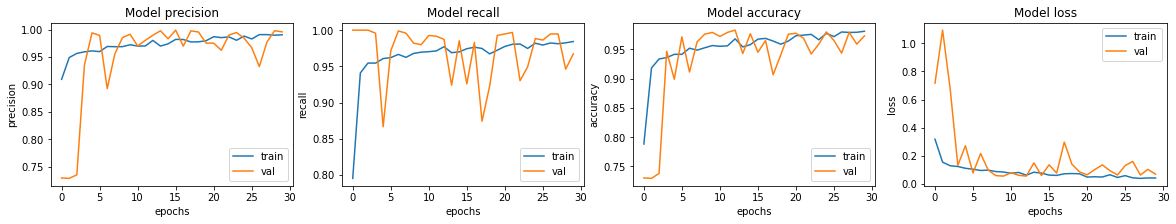

In [22]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [23]:
# 테스트 데이터로 모델 평가를 해보겠습니다.
# 모델 평가를 위해 loss, accuracy, precision, recall 값을 출력 해보겠습니다.

loss, acc, prec, rec = model.evaluate(test_ds)

39/39 [==============================] - 2s 56ms/step - loss: 0.6570 - accuracy: 0.8365 - precision: 0.8051 - recall: 0.9744


## 회고  
미루지 말자...
* 나중에 시도해 볼 것  
  - "Size-constraint loss for weakly supervised CNN segmentation" : https://blog.naver.com/PostView.nhn?blogId=koys007&logNo=221261032274&from=search&redirect=Log&widgetTypeCall=true&directAccess=false  
  - 머핀 : https://m.blog.naver.com/PostView.nhn?blogId=ymkim1959&logNo=221179927651&proxyReferer=https:%2F%2Fwww.google.com%2F  
  - MLP 모델로 이미지 분류 : https://hyjykelly.tistory.com/17
  - https://nsing.tistory.com/15